In [1]:
#khai báo thư viện
import numpy as np
from PIL import Image
import os 
import math
import cv2
import time
import dlib
import cv2
from matplotlib import pyplot as plt
from PIL import ImageFont, ImageDraw, Image
from google.colab.patches import cv2_imshow 
detector= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
recognizer = cv2.face.LBPHFaceRecognizer_create()


In [ ]:
path=os.path.dirname("/content/drive/My Drive/prj3/data2/")
dataPaths=[os.path.join(path,f) for f in os.listdir(path)] 
#print(dataPaths)
id=0
name=''
for dataPath in dataPaths:
    name=os.path.basename(path)


In [ ]:
#lấy dữ liệu từ folder data cắt phần khuôn mặt và lưu vào folder dataset

path=os.path.dirname("/content/drive/My Drive/prj3/data2/")
dataPaths=[os.path.join(path,f) for f in os.listdir(path)] 
#print(dataPaths)
id=0
name=''
for dataPath in dataPaths:
  try: 
    id=id+1
    name=os.path.basename(dataPath)
  except: 
    print("An exception occurred")
  imagePaths=[os.path.join(dataPath,f) for f in os.listdir(dataPath)] 
  #print(imagePaths)
  dem=0
  for imagePath in imagePaths:#lấy đường
    img = cv2.imread(imagePath)
    #print(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
      cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      #tăng biến đếm
      dem=dem+1
      #Lưu khuôn mặt được cắt ra vào folder dataset
      cv2.imwrite("/content/drive/My Drive/prj3/dataset2/"+str(name) +"."+str(id) +'.'+ str(dem) + ".jpg", gray[y:y+h,x:x+w])
      cv2_imshow(img)

    cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#lấy khuôn mặt đã lưu ở trên

path=os.path.dirname("/content/drive/My Drive/prj3/dataset2/")
imagePaths=[os.path.join(path,f) for f in os.listdir(path)] 
print(imagePaths)
print(os.path.basename(path))

['/content/drive/My Drive/prj3/dataset2/elton_john.1.1.jpg', '/content/drive/My Drive/prj3/dataset2/elton_john.1.2.jpg', '/content/drive/My Drive/prj3/dataset2/elton_john.1.3.jpg', '/content/drive/My Drive/prj3/dataset2/elton_john.1.4.jpg', '/content/drive/My Drive/prj3/dataset2/elton_john.1.5.jpg', '/content/drive/My Drive/prj3/dataset2/elton_john.1.6.jpg', '/content/drive/My Drive/prj3/dataset2/elton_john.1.7.jpg', '/content/drive/My Drive/prj3/dataset2/elton_john.1.8.jpg', '/content/drive/My Drive/prj3/dataset2/elton_john.1.9.jpg', '/content/drive/My Drive/prj3/dataset2/elton_john.1.10.jpg', '/content/drive/My Drive/prj3/dataset2/ben_afflek.2.1.jpg', '/content/drive/My Drive/prj3/dataset2/ben_afflek.2.2.jpg', '/content/drive/My Drive/prj3/dataset2/ben_afflek.2.3.jpg', '/content/drive/My Drive/prj3/dataset2/ben_afflek.2.4.jpg', '/content/drive/My Drive/prj3/dataset2/ben_afflek.2.5.jpg', '/content/drive/My Drive/prj3/dataset2/ben_afflek.2.6.jpg', '/content/drive/My Drive/prj3/dataset2

In [ ]:
#train dữ liệu

faces=[]
Ids=[]
for imagePath in imagePaths :
  ID=int(os.path.split(imagePath)[-1].split('.')[1]) 
  faceImg=Image.open(imagePath).convert('L');
  faceNp=np.array(faceImg,'uint8')
  faces.append(faceNp)
  Ids.append(ID)
  cv2.waitKey(10)
  #print(ID ,imagePath)

In [ ]:
recognizer.train(faces,np.array(Ids))
recognizer.save('/content/drive/My Drive/prj3/trainningData2.xml')
cv2.destroyAllWindows()

In [ ]:
#nhận diện khuôn mặt  từ dữ liệu đã train

faceDetect=cv2.CascadeClassifier('haarcascade_frontalface_default.xml');
rec=cv2.face.LBPHFaceRecognizer_create();
rec.read("/content/drive/My Drive/prj3/trainningData2.xml")

#chỉnh chữ
fontface = cv2.FONT_HERSHEY_SIMPLEX
font = ImageFont.truetype("/content/drive/MyDrive/MTO Astro City.ttf", 5)
fontscale = 1
fontcolor = (203,23,252)

In [ ]:
#đổ dữ liệu 
import tensorflow as tf
ba=["Ben Affleck",1972,"male",u"director"]
ej=[u"Elton John",1947,"male",u"singer"]
js=["Jerry Seinfeld",1954,"male",u"comedian"]
mdn=["madonna",1958,"female",u"singer"]
mk=["Mindy Kaling",1979,"female",u"actress"]
data=[]

data.append(ej)
data.append(ba)
data.append(mk)
data.append(mdn)
data.append(js)

print(data)

[['Elton John', 1947, 'male', 'singer'], ['Ben Affleck', 1972, 'male', 'director'], ['Mindy Kaling', 1979, 'female', 'actress'], ['madonna', 1958, 'female', 'singer'], ['Jerry Seinfeld', 1954, 'male', 'comedian']]


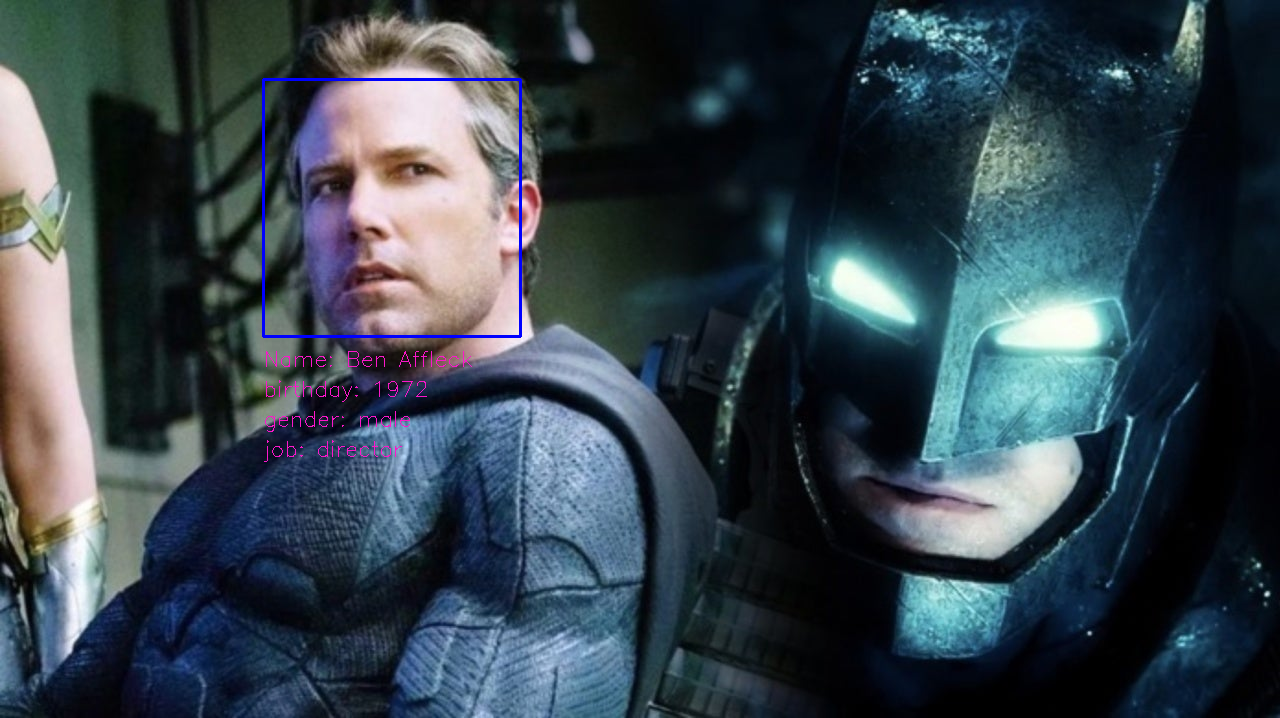

In [ ]:
img = cv2.imread('/content/drive/My Drive/prj3/test/ba2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector.detectMultiScale(gray, 1.3, 5)
#cv2_imshow(img)
[row,col,z]=img.shape

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  #cv2_imshow(img)

cv2.destroyAllWindows()
for(x,y,w,h) in faces:
  
  fontscale=math.sqrt(col)/50
  id=-1
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  id,conf=rec.predict(gray[y:y+h,x:x+w])
  id=id-1
  if(id!=-1):
    result=data[id]
    cv2.putText(img, u"Name: " + str(result[0]), (x,y+h+30), fontface, fontscale, fontcolor ,1)
    cv2.putText(img, u"birthday: " + str(result[1]), (x,y+h+60), fontface, fontscale, fontcolor ,1)
    cv2.putText(img, "gender: " + str(result[2]), (x,y+h+90), fontface, fontscale, fontcolor ,1)
    cv2.putText(img, "job: " + str(result[3]), (x,y+h+120), fontface, fontscale, fontcolor ,1)
  cv2_imshow(img)

In [ ]:
retval	=	rec.getHistograms(		)
#print(retval)

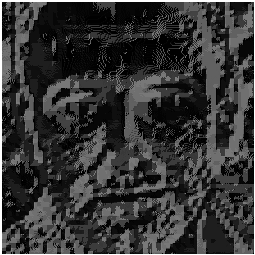

In [ ]:
img= cv2.imread("/content/drive/MyDrive/prj3/dataset2/ben_afflek.2.1.jpg")
img_resized = cv2.resize(src=img, dsize=(255, 255))

img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)



[row,col]=img.shape
img_lbp = np.zeros([255,255,1],dtype=np.uint8)
img_lbp.fill(255)
#cv2_imshow(img_lbp)

idx_row=[-1,0,1,1,1,0,-1,-1]
idx_col=[1,1,1,0,-1,-1,-1,0]

for i in range(2,(row-1)):
  for j in range(2,(col-1)):
    graylevel=img[i,j]
    binary=[]

    for t in range(1,8):
      if img[i+idx_row[t],j+idx_col[t]] < graylevel:
        LBP_pixel = 1
      else :
        LBP_pixel = 0
      if idx_row[t] == -1 and idx_col[t] == 1:
        binary = LBP_pixel
      else:
        binary.append(LBP_pixel)
    img_lbp[i,j] = int("".join(str(x) for x in binary), 2) 
    
cv2_imshow(img_lbp)



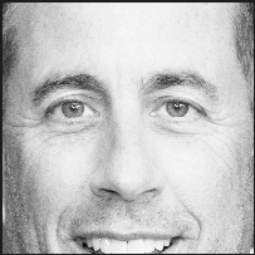

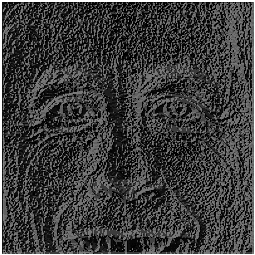

In [2]:
img2= cv2.imread("/content/drive/MyDrive/prj3/New folder/3.png")


gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
faces = detector.detectMultiScale(gray, 1.3, 5)
#cv2_imshow(img)

for (x,y,w,h) in faces:
  cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)
  #cv2_imshow(img2)
  img2=img2[y:y+h,x:x+w]

img2_resized = cv2.resize(src=img2, dsize=(255, 255))
img2 = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)
cv2_imshow(img2)


[row,col]=img2.shape
img_lbp2 = np.zeros([255,255,1],dtype=np.uint8)
img_lbp2.fill(255)
#cv2_imshow(img_lbp)

idx_row=[-1,0,1,1,1,0,-1,-1]
idx_col=[1,1,1,0,-1,-1,-1,0]

for i in range(2,(row-1)):
  for j in range(2,(col-1)):
    graylevel=img2[i,j]
    binary=[]

    for t in range(1,8):
      if img2[i+idx_row[t],j+idx_col[t]] < graylevel:
        LBP_pixel = 1
      else :
        LBP_pixel = 0
      if idx_row[t] == -1 and idx_col[t] == 1:
        binary = LBP_pixel
      else:
        binary.append(LBP_pixel)
    img_lbp2[i,j] = int("".join(str(x) for x in binary), 2) 
    
cv2_imshow(img_lbp2)



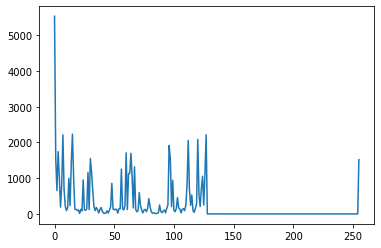

In [12]:
histr  = cv2.calcHist([img_lbp2],[0],None,[256],[0,256])  
plt.plot(histr) 
plt.show()